In [ ]:
MAX=2000
PCT_MUTATION = 0.03
POP_MAX = 5

value = [30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1] 
#optimal_solution = [1,0,1,1,0,1,1,0,1,1,0,1]; F.S = 148

# pop = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#        [1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1],
#        [0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0]]

pop = [random_solution(),
      random_solution(),
      random_solution(),
      random_solution()]

In [2]:
pip install geneticalgorithm

  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15081 sha256=7a8d3b73dd897b86ac1038f0929944fc14eb78798e179fb9f19e9bb2126c2920
  Stored in directory: c:\users\rsasa\appdata\local\pip\cache\wheels\a8\92\ca\5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout
Note: you may need to restart the kernel to use updated packages.


https://pypi.org/project/geneticalgorithm/

 The best solution found:                                                                           
 [4.14765083e-05 4.70103431e-04 1.87839226e-03]

 Objective function:
 0.0023899721983877686


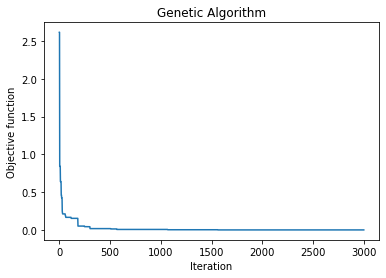

In [5]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return np.sum(X)

algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound,
        algorithm_parameters=algorithm_param)

model.run()

### Binary Encoding

In [353]:
#SELECAO

new_pop = pop.copy()

# Calcular funcao de fitness de cada solução
fs_list = []
for solution in pop:
    fs_list.append(np.sum(np.array(value)*np.array(solution))) 
    
# Aleatoriamente escolher 2 soluções baseado no F.S


idx_list = list(range(len(fs_list)))
prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
choosen_idx = np.random.choice(idx_list, p = prob_fs)
par1 = new_pop[choosen_idx]

#exclui index escolhido da fs e idx_list
fs_list.pop(choosen_idx)
new_pop.pop(choosen_idx)

print(idx_list)
print(fs_list)

idx_list = list(range(len(fs_list)))
prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
choosen_idx = np.random.choice(idx_list, p = prob_fs)
par2 = new_pop[choosen_idx]

#exclui index escolhido da fs e idx_list
fs_list.pop(choosen_idx)
idx_list.pop(choosen_idx)
new_pop.pop(choosen_idx)

print(par1)
print(par2)

#CROSSOVER - singlepoint
#Metade da solução do primeiro + metade da solução do segundo
#TODO: fazer o single point nao ser obrigatoriamente metade do cromososomo

single_point = len(par1)//2

new_cromo = par1[:single_point] + par2[single_point:] 
#mutacao

for idx in range(len(new_cromo)):

    #muda o gene caso PCT_MUTATION
    if np.random.random() < PCT_MUTATION:
        
        if new_cromo[idx] == 0:
            new_cromo[idx] = 1
        
        else:
            new_cromo[idx] = 0
            
pop.append(new_cromo)
np.unique(pop,axis=0)

[0, 1, 2, 3, 4, 5, 6, 7]
[25, 0, 33, -4, 32, 24, 1]
[1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 0]


In [430]:
print(60/2**24)
132/148

3.5762786865234375e-06


0.8918918918918919

In [442]:
def random_solution():
    return [1 if np.random.random() > 0.5 else 0 for x in range(len(value))]

In [469]:
np.array(value)[np.array(value) > 0].sum()

259

In [472]:
2**42

4398046511104

In [503]:
%%time
MAX=2000
PCT_MUTATION = 0.03
POP_MAX = 5

value = [30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1] 
#optimal_solution = [1,0,1,1,0,1,1,0,1,1,0,1]; F.S = 148

# pop = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#        [1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1],
#        [0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0]]

pop = [random_solution(),
      random_solution(),
      random_solution(),
      random_solution()]

for phase in np.arange(MAX):
    
    new_pop = pop.copy()
    
    #SELECAO ====================

    # Calcular funcao de fitness de cada solução
    fs_list = []
    for solution in pop:
        fs_list.append(np.sum(np.array(value)*np.array(solution))) 

    # Aleatoriamente escolher 2 soluções baseado no F.S


    idx_list = list(range(len(fs_list)))
    prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
    choosen_idx = np.random.choice(idx_list, p = prob_fs)
    par1 = new_pop[choosen_idx]

    #exclui index escolhido da fs e idx_list
    fs_list.pop(choosen_idx)
    new_pop.pop(choosen_idx)

    idx_list = list(range(len(fs_list)))
    prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
    choosen_idx = np.random.choice(idx_list, p = prob_fs)
    par2 = new_pop[choosen_idx]

    #exclui index escolhido da fs e idx_list
    fs_list.pop(choosen_idx)
    idx_list.pop(choosen_idx)
    new_pop.pop(choosen_idx)

    #CROSSOVER - singlepoint ====================
    #Metade da solução do primeiro + metade da solução do segundo
    #TODO: fazer o single point nao ser obrigatoriamente metade do cromososomo

    single_point = len(par1)//2

    new_cromo = par1[:single_point] + par2[single_point:] 
    
    #MUTAÇÃO ====================

    for idx in range(len(new_cromo)):

        #muda o gene caso PCT_MUTATION
        if np.random.random() < PCT_MUTATION:

            if new_cromo[idx] == 0:
                new_cromo[idx] = 1

            else:
                new_cromo[idx] = 0

    pop.append(new_cromo)
    pop = np.unique(pop,axis=0).tolist()
    
    best_sol = np.max(np.sum(np.array(value)*np.array(pop),axis=1))
    
    #survival of the fittest
    if len(pop) > POP_MAX:
        #extrai a pior solução de pop
        worst_idx = np.argmin(np.sum(np.array(value)*np.array(pop),axis=1))
        pop.pop(worst_idx)
        
    print('Round',phase + 1,':',best_sol)

Round 1 : 145
Round 2 : 145
Round 3 : 145
Round 4 : 145
Round 5 : 169
Round 6 : 169
Round 7 : 169
Round 8 : 169
Round 9 : 181
Round 10 : 181
Round 11 : 181
Round 12 : 181
Round 13 : 181
Round 14 : 181
Round 15 : 181
Round 16 : 181
Round 17 : 181
Round 18 : 181
Round 19 : 181
Round 20 : 181
Round 21 : 181
Round 22 : 201
Round 23 : 201
Round 24 : 201
Round 25 : 201
Round 26 : 201
Round 27 : 201
Round 28 : 201
Round 29 : 201
Round 30 : 210
Round 31 : 210
Round 32 : 210
Round 33 : 210
Round 34 : 210
Round 35 : 210
Round 36 : 210
Round 37 : 211
Round 38 : 211
Round 39 : 211
Round 40 : 211
Round 41 : 211
Round 42 : 211
Round 43 : 211
Round 44 : 218
Round 45 : 221
Round 46 : 221
Round 47 : 221
Round 48 : 224
Round 49 : 224
Round 50 : 224
Round 51 : 224
Round 52 : 224
Round 53 : 224
Round 54 : 224
Round 55 : 224
Round 56 : 224
Round 57 : 224
Round 58 : 224
Round 59 : 224
Round 60 : 224
Round 61 : 224
Round 62 : 224
Round 63 : 224
Round 64 : 224
Round 65 : 224
Round 66 : 224
Round 67 : 224
Roun

Round 611 : 258
Round 612 : 258
Round 613 : 258
Round 614 : 258
Round 615 : 258
Round 616 : 258
Round 617 : 258
Round 618 : 258
Round 619 : 258
Round 620 : 258
Round 621 : 258
Round 622 : 258
Round 623 : 258
Round 624 : 258
Round 625 : 258
Round 626 : 258
Round 627 : 258
Round 628 : 258
Round 629 : 258
Round 630 : 258
Round 631 : 258
Round 632 : 258
Round 633 : 258
Round 634 : 258
Round 635 : 258
Round 636 : 258
Round 637 : 258
Round 638 : 258
Round 639 : 258
Round 640 : 258
Round 641 : 258
Round 642 : 258
Round 643 : 258
Round 644 : 258
Round 645 : 258
Round 646 : 258
Round 647 : 258
Round 648 : 258
Round 649 : 258
Round 650 : 258
Round 651 : 258
Round 652 : 258
Round 653 : 258
Round 654 : 258
Round 655 : 258
Round 656 : 258
Round 657 : 258
Round 658 : 258
Round 659 : 258
Round 660 : 258
Round 661 : 259
Round 662 : 259
Round 663 : 259
Round 664 : 259
Round 665 : 259
Round 666 : 259
Round 667 : 259
Round 668 : 259
Round 669 : 259
Round 670 : 259
Round 671 : 259
Round 672 : 259
Round 67

Round 1157 : 259
Round 1158 : 259
Round 1159 : 259
Round 1160 : 259
Round 1161 : 259
Round 1162 : 259
Round 1163 : 259
Round 1164 : 259
Round 1165 : 259
Round 1166 : 259
Round 1167 : 259
Round 1168 : 259
Round 1169 : 259
Round 1170 : 259
Round 1171 : 259
Round 1172 : 259
Round 1173 : 259
Round 1174 : 259
Round 1175 : 259
Round 1176 : 259
Round 1177 : 259
Round 1178 : 259
Round 1179 : 259
Round 1180 : 259
Round 1181 : 259
Round 1182 : 259
Round 1183 : 259
Round 1184 : 259
Round 1185 : 259
Round 1186 : 259
Round 1187 : 259
Round 1188 : 259
Round 1189 : 259
Round 1190 : 259
Round 1191 : 259
Round 1192 : 259
Round 1193 : 259
Round 1194 : 259
Round 1195 : 259
Round 1196 : 259
Round 1197 : 259
Round 1198 : 259
Round 1199 : 259
Round 1200 : 259
Round 1201 : 259
Round 1202 : 259
Round 1203 : 259
Round 1204 : 259
Round 1205 : 259
Round 1206 : 259
Round 1207 : 259
Round 1208 : 259
Round 1209 : 259
Round 1210 : 259
Round 1211 : 259
Round 1212 : 259
Round 1213 : 259
Round 1214 : 259
Round 1215 : 2

Round 1670 : 259
Round 1671 : 259
Round 1672 : 259
Round 1673 : 259
Round 1674 : 259
Round 1675 : 259
Round 1676 : 259
Round 1677 : 259
Round 1678 : 259
Round 1679 : 259
Round 1680 : 259
Round 1681 : 259
Round 1682 : 259
Round 1683 : 259
Round 1684 : 259
Round 1685 : 259
Round 1686 : 259
Round 1687 : 259
Round 1688 : 259
Round 1689 : 259
Round 1690 : 259
Round 1691 : 259
Round 1692 : 259
Round 1693 : 259
Round 1694 : 259
Round 1695 : 259
Round 1696 : 259
Round 1697 : 259
Round 1698 : 259
Round 1699 : 259
Round 1700 : 259
Round 1701 : 259
Round 1702 : 259
Round 1703 : 259
Round 1704 : 259
Round 1705 : 259
Round 1706 : 259
Round 1707 : 259
Round 1708 : 259
Round 1709 : 259
Round 1710 : 259
Round 1711 : 259
Round 1712 : 259
Round 1713 : 259
Round 1714 : 259
Round 1715 : 259
Round 1716 : 259
Round 1717 : 259
Round 1718 : 259
Round 1719 : 259
Round 1720 : 259
Round 1721 : 259
Round 1722 : 259
Round 1723 : 259
Round 1724 : 259
Round 1725 : 259
Round 1726 : 259
Round 1727 : 259
Round 1728 : 2

In [ ]:
%%time
MAX=2000
PCT_MUTATION = 0.03
POP_MAX = 5

value = [30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1] 
#optimal_solution = [1,0,1,1,0,1,1,0,1,1,0,1]; F.S = 148

# pop = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#        [1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1],
#        [0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0]]
### Binary Encoding

#SELECAO

new_pop = pop.copy()

# Calcular funcao de fitness de cada solução
fs_list = []
for solution in pop:
    fs_list.append(np.sum(np.array(value)*np.array(solution))) 
    
# Aleatoriamente escolher 2 soluções baseado no F.S


idx_list = list(range(len(fs_list)))
prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
choosen_idx = np.random.choice(idx_list, p = prob_fs)
par1 = new_pop[choosen_idx]

#exclui index escolhido da fs e idx_list
fs_list.pop(choosen_idx)
new_pop.pop(choosen_idx)

print(idx_list)
print(fs_list)

idx_list = list(range(len(fs_list)))
prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
choosen_idx = np.random.choice(idx_list, p = prob_fs)
par2 = new_pop[choosen_idx]

#exclui index escolhido da fs e idx_list
fs_list.pop(choosen_idx)
idx_list.pop(choosen_idx)
new_pop.pop(choosen_idx)

print(par1)
print(par2)

#CROSSOVER - singlepoint
#Metade da solução do primeiro + metade da solução do segundo
#TODO: fazer o single point nao ser obrigatoriamente metade do cromososomo

single_point = len(par1)//2

new_cromo = par1[:single_point] + par2[single_point:] 
#mutacao

for idx in range(len(new_cromo)):

    #muda o gene caso PCT_MUTATION
    if np.random.random() < PCT_MUTATION:
        
        if new_cromo[idx] == 0:
            new_cromo[idx] = 1
        
        else:
            new_cromo[idx] = 0
            
pop.append(new_cromo)
np.unique(pop,axis=0)

print(60/2**24)
132/148

def random_solution():
    return [1 if np.random.random() > 0.5 else 0 for x in range(len(value))]

np.array(value)[np.array(value) > 0].sum()

2**42

%%time
MAX=2000
PCT_MUTATION = 0.03
POP_MAX = 5

value = [30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1,30,-10,4,2,-2,1] 
#optimal_solution = [1,0,1,1,0,1,1,0,1,1,0,1]; F.S = 148

# pop = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#        [1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1],
#        [0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0]]

pop = [random_solution(),
      random_solution(),
      random_solution(),
      random_solution()]

for phase in np.arange(MAX):
    
    new_pop = pop.copy()
    
    #SELECAO ====================

    # Calcular funcao de fitness de cada solução
    fs_list = []
    for solution in pop:
        fs_list.append(np.sum(np.array(value)*np.array(solution))) 

    # Aleatoriamente escolher 2 soluções baseado no F.S


    idx_list = list(range(len(fs_list)))
    prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
    choosen_idx = np.random.choice(idx_list, p = prob_fs)
    par1 = new_pop[choosen_idx]

    #exclui index escolhido da fs e idx_list
    fs_list.pop(choosen_idx)
    new_pop.pop(choosen_idx)

    idx_list = list(range(len(fs_list)))
    prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
    choosen_idx = np.random.choice(idx_list, p = prob_fs)
    par2 = new_pop[choosen_idx]

    #exclui index escolhido da fs e idx_list
    fs_list.pop(choosen_idx)
    idx_list.pop(choosen_idx)
    new_pop.pop(choosen_idx)

    #CROSSOVER - singlepoint ====================
    #Metade da solução do primeiro + metade da solução do segundo
    #TODO: fazer o single point nao ser obrigatoriamente metade do cromososomo

    single_point = len(par1)//2

    new_cromo = par1[:single_point] + par2[single_point:] 
    
    #MUTAÇÃO ====================

    for idx in range(len(new_cromo)):

        #muda o gene caso PCT_MUTATION
        if np.random.random() < PCT_MUTATION:

            if new_cromo[idx] == 0:
                new_cromo[idx] = 1

            else:
                new_cromo[idx] = 0

    pop.append(new_cromo)
    pop = np.unique(pop,axis=0).tolist()
    
    best_sol = np.max(np.sum(np.array(value)*np.array(pop),axis=1))
    
    #survival of the fittest
    if len(pop) > POP_MAX:
        #extrai a pior solução de pop
        worst_idx = np.argmin(np.sum(np.array(value)*np.array(pop),axis=1))
        pop.pop(worst_idx)
        
    print('Round',phase + 1,':',best_sol)
pop = [random_solution(),
      random_solution(),
      random_solution(),
      random_solution()]

for phase in np.arange(MAX):
    
    new_pop = pop.copy()
    
    #SELECAO ====================

    # Calcular funcao de fitness de cada solução
    fs_list = []
    for solution in pop:
        fs_list.append(np.sum(np.array(value)*np.array(solution))) 

    # Aleatoriamente escolher 2 soluções baseado no F.S


    idx_list = list(range(len(fs_list)))
    prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
    choosen_idx = np.random.choice(idx_list, p = prob_fs)
    par1 = new_pop[choosen_idx]

    #exclui index escolhido da fs e idx_list
    fs_list.pop(choosen_idx)
    new_pop.pop(choosen_idx)

    idx_list = list(range(len(fs_list)))
    prob_fs = np.abs(fs_list)/np.abs(fs_list).sum()
    choosen_idx = np.random.choice(idx_list, p = prob_fs)
    par2 = new_pop[choosen_idx]

    #exclui index escolhido da fs e idx_list
    fs_list.pop(choosen_idx)
    idx_list.pop(choosen_idx)
    new_pop.pop(choosen_idx)

    #CROSSOVER - singlepoint ====================
    #Metade da solução do primeiro + metade da solução do segundo
    #TODO: fazer o single point nao ser obrigatoriamente metade do cromososomo

    single_point = len(par1)//2

    new_cromo = par1[:single_point] + par2[single_point:] 
    
    #MUTAÇÃO ====================

    for idx in range(len(new_cromo)):

        #muda o gene caso PCT_MUTATION
        if np.random.random() < PCT_MUTATION:

            if new_cromo[idx] == 0:
                new_cromo[idx] = 1

            else:
                new_cromo[idx] = 0

    pop.append(new_cromo)
    pop = np.unique(pop,axis=0).tolist()
    
    best_sol = np.max(np.sum(np.array(value)*np.array(pop),axis=1))
    
    #survival of the fittest
    if len(pop) > POP_MAX:
        #extrai a pior solução de pop
        worst_idx = np.argmin(np.sum(np.array(value)*np.array(pop),axis=1))
        pop.pop(worst_idx)
        
    print('Round',phase + 1,':',best_sol)